 #    Stock  Market  Prediction  and  Forecasting  using  LSTM


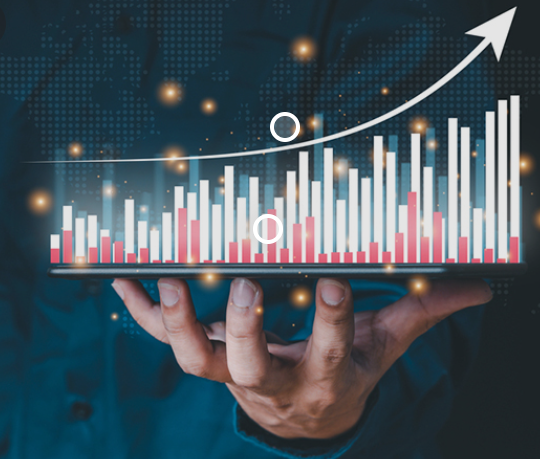

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv("Data.csv")

In [2]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


## Understanding the features of dataset
1) Date : The day at which the data point was collected

2) Open	: Starting point or starting value of stocks

3) High : Highest stock price during the last 24hrs cycle

4) Low  : Lowest stock price during the last 24hrs cycle

5) Last	: The last price at which a stock was bought

6) Close : The closing price of stock

7) Total Trade Quantity : No. of stocks sold

9) Turnover (Lacs) : Value in lacs earned from stocks

## Tasks
### => Predicting turnover

### => Predicting the close value at nth day

# Task 1 : Predicting the turnover

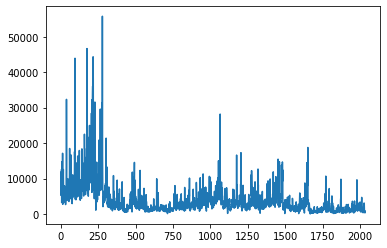

In [5]:
plt.plot(dataset['Turnover (Lacs)'])

C:\Users\pragy\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Trade Quantity', ylabel='Turnover (Lacs)'>

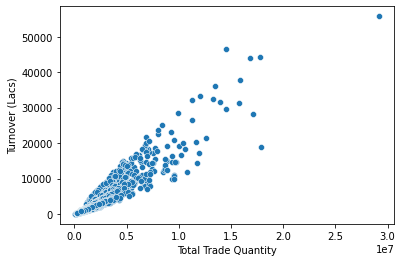

In [6]:
sns.scatterplot(dataset['Total Trade Quantity'],dataset['Turnover (Lacs)'])

In [7]:
dataset.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [8]:
df1=dataset[['Total Trade Quantity','Turnover (Lacs)']]
X=np.array(df1['Total Trade Quantity'])
y=np.array(df1['Turnover (Lacs)'])
X=X.reshape(2035,1)
y=y.reshape(2035,1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
X=Scaler.fit_transform(X)
y=Scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.4, train_size=0.6,shuffle=False)

In [12]:
train_X.shape

(1221, 1)

In [13]:
train_Y.shape

(1221, 1)

In [14]:
train_X=train_X.reshape(1221,1)
print(train_X.shape)
train_Y=train_Y.reshape(1221,1)
print(train_Y.shape)

(1221, 1)
(1221, 1)


In [15]:
#train_X=train_X[np.newaxis,:]
#train_Y=train_Y[np.newaxis,:]

In [16]:
print(train_X.shape)
print(train_Y.shape)

(1221, 1)
(1221, 1)


In [17]:
print(len(test_X))
print(len(test_Y))

814
814


In [18]:
test_X.shape

(814, 1)

In [19]:
test_Y.shape

(814, 1)

In [20]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression().fit(train_X,train_Y)
lin_model

LinearRegression()

In [21]:
len(lin_model.intercept_)

1

In [22]:
lin_model.intercept_

array([-0.01561107])

In [23]:
lin_model

LinearRegression()

In [24]:
X=Scaler.inverse_transform(X)
y=Scaler.inverse_transform(y)

In [25]:
X

array([[5828.95978857],
       [9676.36783041],
       [4244.45524239],
       ...,
       [ 499.01298909],
       [ 521.94898412],
       [1220.26211126]])

In [26]:
y

array([[ 7162.35],
       [11859.95],
       [ 5248.6 ],
       ...,
       [  340.31],
       [  355.17],
       [  803.56]])

C:\Users\pragy\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


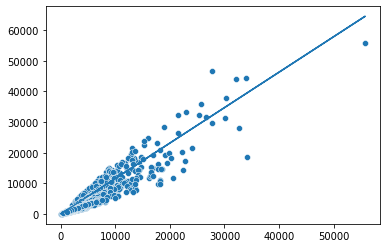

In [27]:
sns.scatterplot(X[:,0],y[:,0])
plt.plot(X,lin_model.predict(X))

# Task 2 : Predicting the close value on nth day

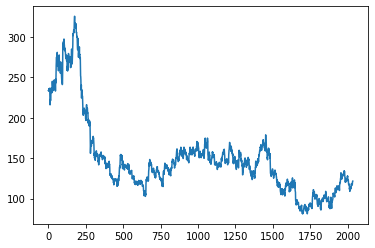

In [28]:
plt.plot(dataset['Close'])

In [29]:
Close=dataset['Close'].iloc[::-1]

In [30]:
Close

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

In [31]:
scaler=MinMaxScaler(feature_range=(0,1))
Close=scaler.fit_transform(np.array(Close).reshape(-1,1))
Close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [32]:
import math
size=len(Close)
train_size=math.floor(0.6*size)
val_size=math.floor(0.2*size)
test_size=math.floor(0.2*size)
train_data,val_data,test_data=Close[:train_size,0],Close[train_size:train_size+val_size,0],Close[train_size+val_size:train_size+val_size+test_size,0]

In [33]:
len(train_data)

1221

In [34]:
len(val_data)

407

In [35]:
len(test_data)

407

In [36]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]   
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

In [37]:
train_X,train_Y=create_dataset(train_data,100)
val_X,val_Y=create_dataset(val_data,100)
test_X,test_Y=create_dataset(test_data,100)

In [38]:
train_X[:1]

array([[0.16584967, 0.16319444, 0.1621732 , 0.14971405, 0.15400327,
        0.15236928, 0.14562908, 0.14338235, 0.14848856, 0.15257353,
        0.14522059, 0.13521242, 0.12724673, 0.13031046, 0.12806373,
        0.13459967, 0.12908497, 0.13562092, 0.12377451, 0.1190768 ,
        0.11397059, 0.13112745, 0.12479575, 0.14603758, 0.14501634,
        0.14726307, 0.15196078, 0.1503268 , 0.14971405, 0.16156046,
        0.17177288, 0.1693219 , 0.16830065, 0.17238562, 0.19097222,
        0.18913399, 0.19138072, 0.18382353, 0.17544935, 0.17279412,
        0.16830065, 0.17034314, 0.17810458, 0.16973039, 0.16278595,
        0.17401961, 0.18035131, 0.17422386, 0.17116013, 0.16564542,
        0.16033497, 0.17381536, 0.17851307, 0.18811275, 0.19750817,
        0.21425654, 0.21098856, 0.21772876, 0.20445261, 0.21568627,
        0.2128268 , 0.1997549 , 0.19873366, 0.19934641, 0.19771242,
        0.20200163, 0.19444444, 0.19403595, 0.18954248, 0.18913399,
        0.19607843, 0.17851307, 0.17810458, 0.18

In [39]:
train_X=train_X.reshape(train_X.shape[0],train_X.shape[1] , 1)
val_X = val_X.reshape(val_X.shape[0],val_X.shape[1] , 1)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(train_X,train_Y,validation_data=(val_X,val_Y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 9s 209ms/step - loss: 0.0109 - val_loss: 0.0013
Epoch 2/100
18/18 [==============================] - 3s 148ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/100
18/18 [==============================] - 3s 142ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
18/18 [==============================] - 3s 187ms/step - loss: 8.9032e-04 - val_loss: 0.0010
Epoch 5/100
18/18 [==============================] - 2s 131ms/step - loss: 8.6166e-04 - val_loss: 9.9128e-04
Epoch 6/100
18/18 [==============================] - 2s 132ms/step - loss: 8.3304e-04 - val_loss: 9.3579e-04
Epoch 7/100
18/18 [==============================] - 2s 133ms/step - loss: 8.2875e-04 - val_loss: 9.1499e-04
Epoch 8/100
18/18 [==============================] - 2s 134ms/step - loss: 7.9759e-04 - val_loss: 8.6939e-04
Epoch 9/100
18/18 [==============================] - 2s 132ms/step - loss: 7.7076e-04 - val_loss: 8.3600e-04
Epoch 10/100
18/18 [===========================

Epoch 76/100
18/18 [==============================] - 3s 149ms/step - loss: 1.6909e-04 - val_loss: 1.3241e-04
Epoch 77/100
18/18 [==============================] - 3s 172ms/step - loss: 1.5624e-04 - val_loss: 1.3828e-04
Epoch 78/100
18/18 [==============================] - 3s 151ms/step - loss: 1.5961e-04 - val_loss: 1.4440e-04
Epoch 79/100
18/18 [==============================] - 3s 151ms/step - loss: 1.9822e-04 - val_loss: 1.6748e-04
Epoch 80/100
18/18 [==============================] - 4s 214ms/step - loss: 1.8404e-04 - val_loss: 1.3772e-04
Epoch 81/100
18/18 [==============================] - 3s 147ms/step - loss: 1.7101e-04 - val_loss: 1.3152e-04
Epoch 82/100
18/18 [==============================] - 3s 145ms/step - loss: 1.6064e-04 - val_loss: 1.2641e-04
Epoch 83/100
18/18 [==============================] - 3s 162ms/step - loss: 1.5579e-04 - val_loss: 1.4137e-04
Epoch 84/100
18/18 [==============================] - 3s 140ms/step - loss: 1.6849e-04 - val_loss: 2.0435e-04
Epoch 85/1

In [185]:
len(test_data)

407

In [186]:
len(test_data[-100:])

100

In [187]:
test_vals=test_data[-100:]
tmp_vals=test_vals[0].tolist()

In [188]:
test_vals=test_vals.reshape(1,-1)
tmp_vals=test_vals[0].tolist()
#tmp_vals

In [189]:
def predict_n(tmp_vals,test_vals,n):
    i=0
    preds=list()
    while(i<n):
        if len(tmp_vals)>100 :
            test_vals=np.array(tmp_vals[1:])
            test_vals=test_vals.reshape(1,-1)
            test_vals = test_vals.reshape((1, 100 , 1))
            yhat = model.predict(test_vals, verbose=0)
            preds.append(yhat)
            tmp_vals.extend(yhat[0].tolist())
            tmp_vals=tmp_vals[1:]
            i=i+1
        else:
            test_vals = test_vals.reshape((1, 100 ,1))
            yhat = model.predict(test_vals, verbose=0)
            preds.append(yhat)
            tmp_vals.extend(yhat[0].tolist())
            i=i+1
    print(" Day {} Closing value will be : {} ".format(n,yhat))
    return preds

In [190]:
#predict_n(tmp_vals,test_vals,200)

In [191]:
test_data=test_data.reshape(-1,1)

In [192]:
#Plotting the vals for next 50 days
predicts=predict_n(tmp_vals,test_vals,50)
test_data_inv=scaler.inverse_transform(test_data)
preds_inv=scaler.inverse_transform(np.array(predicts).reshape(-1,1))

 Day 50 Closing value will be : [[0.31442493]] 


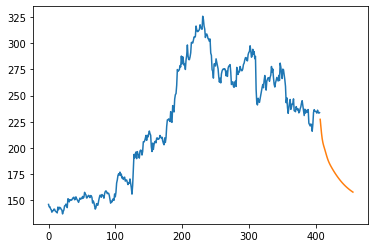

In [194]:
plt.plot(np.arange(0,407),test_data_inv)
plt.plot(np.arange(407,457),preds_inv)